## Enhancement to concentration
Demonstrate 2 classes for converting enhancement to concentration using analytical and numerical approaches.
### Imports

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sepal import dce_fit, relaxivity, signal_models, aifs
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Setup
First define some parameters.
Then define concentration-relaxation and relaxation-signal relationships.

In [7]:
r1, r2 = 5.0, 0  # /s/mM
tr, fa, te  = 3.4e-3, 15, 1.7e-3  # s/deg
t10 = 2  # s
k_fa = 1.0
c_to_r_model = relaxivity.CRLinear(r1, r2)
signal_model = signal_models.SPGR(tr, fa, te)

Calculate and plot the predicted enhancement for a range of concentrations.

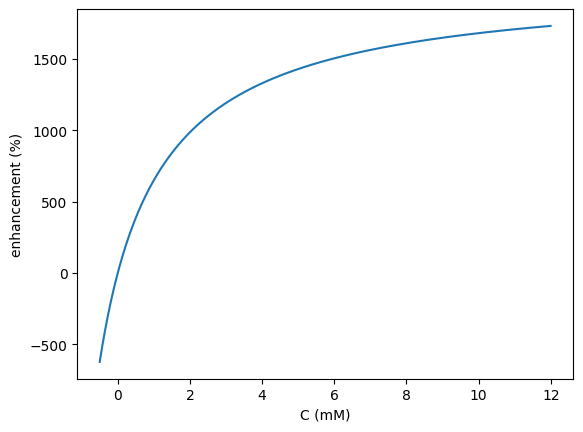

In [8]:
conc_range = np.arange(-0.5, 12, 0.005)  # mM
enh = dce_fit.conc_to_enh(conc_range, t10, k_fa, c_to_r_model, signal_model)
plt.plot(conc_range, enh)
plt.xlabel('C (mM)')
plt.ylabel('enhancement (%)');

### Enhancement to concentration conversion
Now take these enhancments and go backwards to estimate concentration.
First use the general method to convert enhancement to concentration.
This uses a numerical method to estimate concentration.
Accounts for pulse sequence and T2* dephasing.

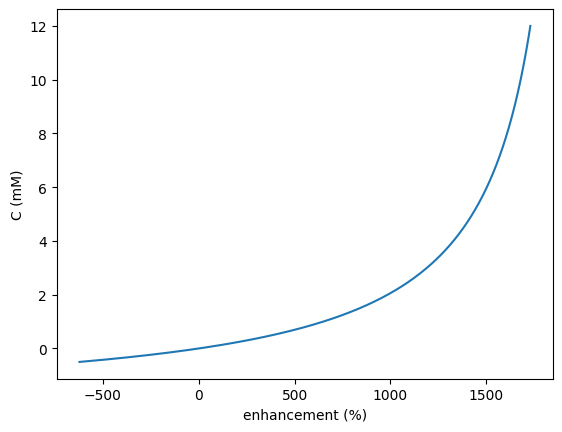

In [9]:
c_to_r_model = relaxivity.CRLinear(r1, r2)
signal_model = signal_models.SPGR(tr, fa, te)
e_to_c_num = dce_fit.EnhToConc(c_to_r_model, signal_model)  # EnhToConc (numerical) object
C_t_num = e_to_c_num.proc(enh, t10, k_fa=k_fa)  # mM
plt.plot(enh, C_t_num)
plt.xlabel('enhancement (%)')
plt.ylabel('C (mM)');

Now use the analytical method.
This assumes the SPGR pulse sequence.
It does not account for T2* dephasing.

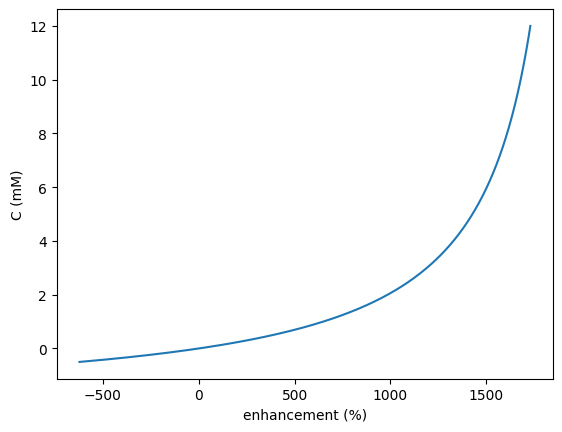

In [10]:
e_to_c_ana = dce_fit.EnhToConcSPGR(tr, fa, r1)  # EnhToConcSPGR object
C_t_ana = e_to_c_ana.proc(enh, t10, k_fa=k_fa)  # mM
plt.plot(enh, C_t_ana)
plt.xlabel('enhancement (%)')
plt.ylabel('C (mM)');

Plot difference between estimated and true concentrations

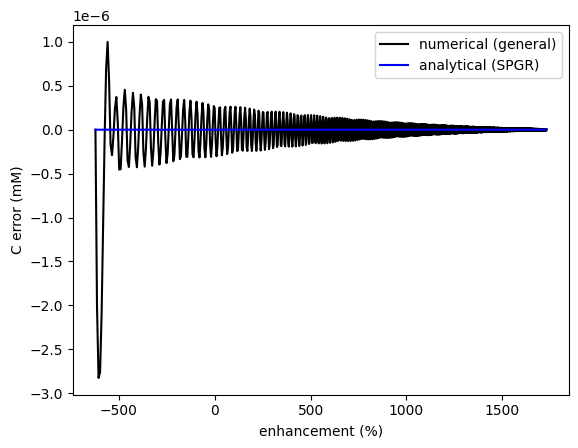

In [11]:
plt.plot(enh, C_t_num - conc_range, 'k-', label='numerical (general)')
plt.plot(enh, C_t_ana - conc_range, 'b-', label='analytical (SPGR)');
plt.legend()
plt.xlabel('enhancement (%)')
plt.ylabel('C error (mM)');